In [5]:
%matplotlib widget

ImportError: Failed to import any qt binding

In [ ]:
import mat73
import numpy as np

In [2]:
phant = mat73.loadmat("phantom_atlas_density_cls.mat")

In [4]:
list(phant['phantom_atlas_density_cls'].keys())

['ct',
 'mr',
 'nIter',
 'phantom',
 'phantom_guided_filter',
 'phantom_smoothed',
 'umap',
 'voxelSize_mm']

In [5]:
y= np.array(phant['phantom_atlas_density_cls']['phantom']); print(y.shape)

In [40]:
y[250,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
#%matplotlib inline
#%matplotlib notebook
#%matplotlib qt
#%matplotlib nbagg


ImportError: Failed to import any qt binding

In [7]:
import matplotlib.pyplot as plt

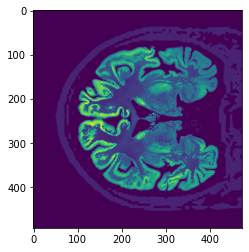

In [44]:
plt.imshow(y[250,:,:])

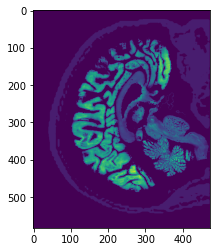

In [45]:
plt.imshow(y[:,250,:])

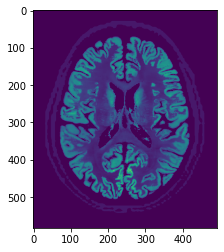

In [46]:
plt.imshow(y[:,:,250])

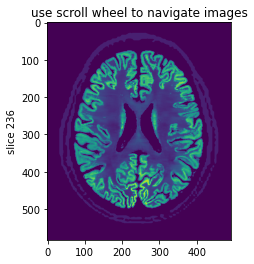

In [8]:


class IndexTracker:
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(1, 1)


tracker = IndexTracker(ax, y)


fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()